In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-05-24 16:09:36--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-05-24 16:09:36--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-05-24 16:09:36--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [2]:
import numpy as np
fruits = np.load("/content/fruits_300.npy")
fruits_2d = fruits.reshape(-1, 100*100)

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [4]:
print(pca.components_.shape)

(50, 10000)


In [5]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i,j].imshow(arr[i*10+j], cmap = "gray_r")
      axs[i,j].axis("off")
  plt.show()

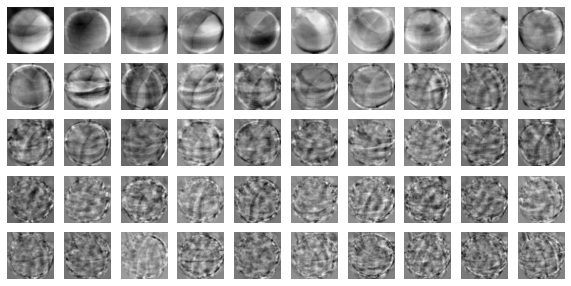

In [6]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [7]:
print(fruits_2d.shape)

(300, 10000)


In [9]:
# 원본데이터(fruits_2d)의 차원을 50으로 줄여줌
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [10]:
# 차원을 되돌려줌
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


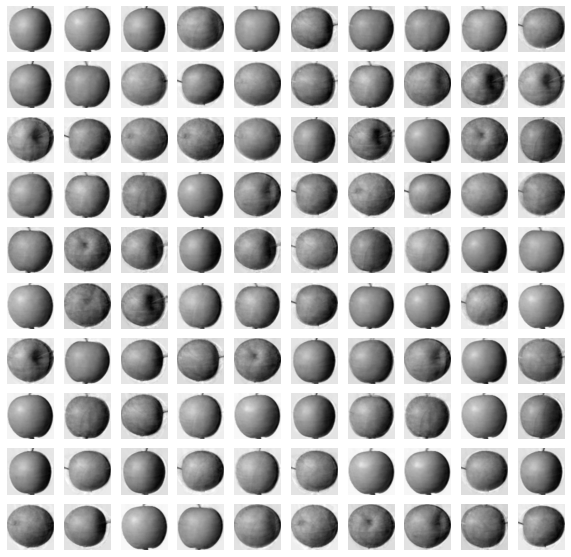

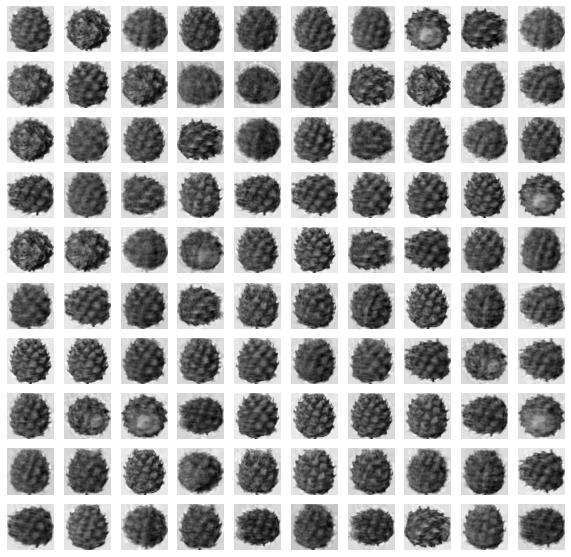

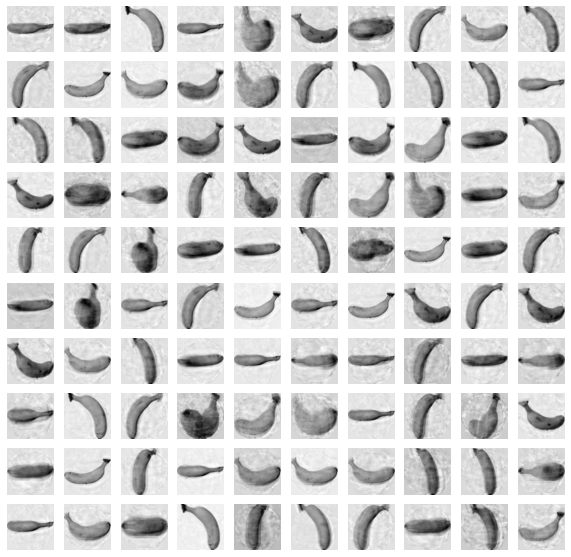

In [11]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

#설명된 분산

In [ ]:
# 각 주성분의 설명된 분산 비율을 전부 더함
print(np.sum(pca.explained_variance_ratio_))

0.9215998142074717


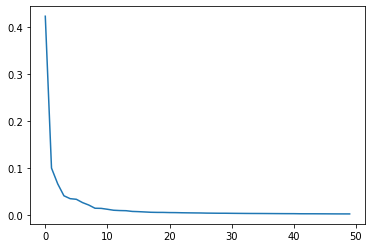

In [12]:
# 각 주성분의 설명된 분산 비율을 그래프로 표현
plt.plot(pca.explained_variance_ratio_)
plt.show()

#다른 알고리즘과 함께 사용하기

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [14]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [15]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

0.9966666666666667
1.6878076076507569


In [16]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

1.0
0.030163288116455078


In [17]:
# 설명된 분산의 50%에 달하는 주성분 찾기
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [18]:
# 2개의 주성분으로 50% 넘김
print(pca.n_components_)

2


In [19]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [20]:
scores = cross_validate(lr,fruits_pca, target)
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

0.9933333333333334
0.045993614196777347


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [21]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=19)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))


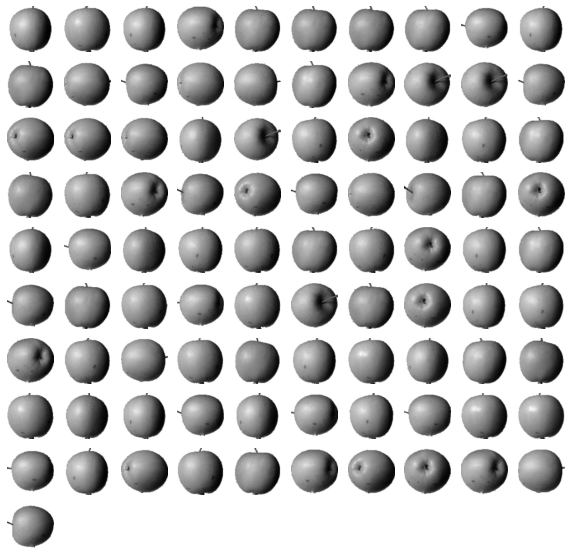

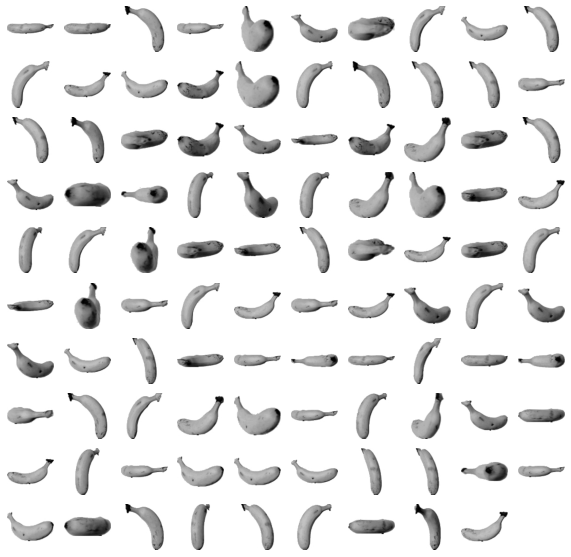

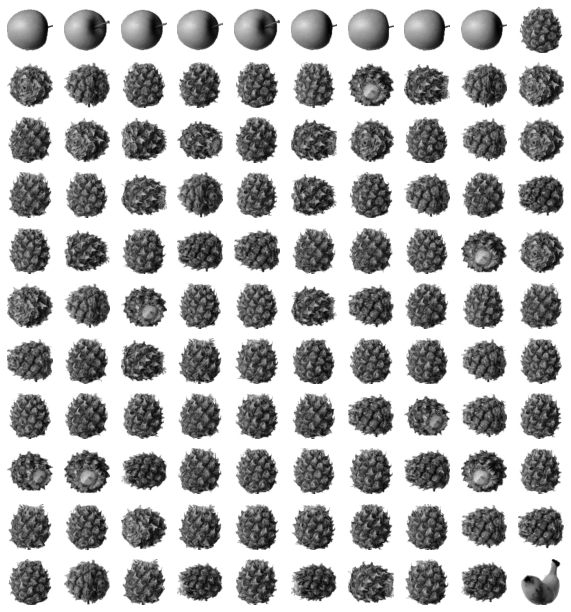

In [22]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_ == label])
  print("\n")

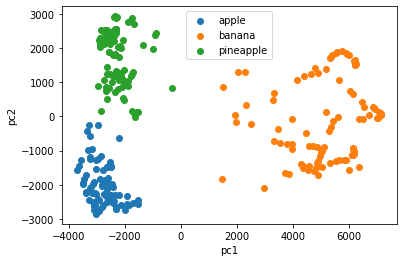

In [23]:
for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(["apple","banana","pineapple"])
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.show()